In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/complaints.csv')

In [4]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33009,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523056
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MI,48234,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523057
2,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",GA,30034,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446803
3,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CO,80249,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446804
4,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051247,2015-02-21,Credit card,NaN,Sale of account,NaN,NaN,NaN,JPMORGAN CHASE & CO.,AL,36695,NaN,NaN,Web,2015-02-21,Closed with explanation,Yes,Yes,1250605
4051248,2015-07-19,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",IL,60614,NaN,Consent not provided,Web,2015-07-19,Closed with explanation,Yes,No,1473577
4051249,2022-06-16,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,NaN,Mr. Cooper Group Inc.,IA,52205,NaN,NaN,Referral,2022-06-17,Closed with explanation,Yes,NaN,5683655
4051250,2022-04-26,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,V and H Portfolio,SC,29624,NaN,Consent not provided,Web,2022-04-26,Closed with non-monetary relief,Yes,NaN,5495755


In [5]:
data.shape

(4051252, 18)

In [6]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        715933
Consumer complaint narrative    2584946
Company public response         2180903
Company                               0
State                             43182
ZIP code                          30209
Tags                            3626984
Consumer consent provided?       903030
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3282894
Complaint ID                          0
dtype: int64

In [7]:
data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [8]:
data.describe()

,Complaint ID
count,4.051252e+06
mean,4.311083e+06
std,2.022199e+06
min,1.000000e+00
25%,2.867282e+06
50%,4.242992e+06
75%,6.130034e+06
max,7.525660e+06


In [9]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
data['Company'].nunique()

6923

In [11]:
data['Company'].unique()

array(['EQUIFAX, INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.',
       'Experian Information Solutions Inc.', ..., 'PREFERRED LOANS LLC',
       'Eckhoff & Massarelli, P.C.', 'Parkstone Mortgage, LLC'],
      dtype=object)

In [12]:
data['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Checking or savings account',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Vehicle loan or lease', 'Credit card',
       'Money transfer, virtual currency, or money service',
       'Debt or credit management', 'Bank account or service',
       'Payday loan, title loan, personal loan, or advance loan',
       'Credit reporting', 'Payday loan', 'Prepaid card', 'Consumer Loan',
       'Money transfers', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [13]:
product_list = list(data['Issue'].unique())
print(product_list)

['Incorrect information on your report', 'Improper use of your report', "Problem with a credit reporting company's investigation into an existing problem", 'Attempts to collect debt not owed', 'Took or threatened to take negative or legal action', 'Applying for a mortgage or refinancing an existing mortgage', 'Managing an account', 'Other features, terms, or problems', 'Getting the loan', "Problem with a company's investigation into an existing issue", 'Dealing with your lender or servicer', 'Problem when making payments', 'Problems at the end of the loan or lease', 'Opening an account', 'Problem with a purchase or transfer', 'Getting a credit card', 'Problem with a purchase shown on your statement', 'Advertising and marketing, including promotional offers', 'Struggling to pay mortgage', 'Problem with a lender or other company charging your account', 'Credit monitoring or identity theft protection services', 'Closing an account', 'Written notification about debt', 'Trouble during payme

New data frame with listed categories for 'Product'

In [14]:
if data is not None:
    target_categories = ["Mortgage", "Consumer Loan", "Debt collection", "Credit reporting, credit repair services, or other personal consumer reports"]
    mask = data['Product'].isin(target_categories)
    data1 = data[mask]

In [15]:
data1

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",GA,30034,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446803
3,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CO,80249,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446804
4,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442566
5,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",CA,95648,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7446815
6,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051240,2022-08-16,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,ALLIANT CREDIT UNION,GA,30127,NaN,NaN,Referral,2022-08-16,Closed with explanation,Yes,NaN,5886757
4051245,2022-08-16,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,CONTRACT CALLERS INC,VA,23223,NaN,Consent not provided,Web,2022-08-16,Closed with explanation,Yes,NaN,5882345
4051246,2022-08-13,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,AFNI INC.,FL,33647,NaN,Consent not provided,Web,2022-08-13,Closed with explanation,Yes,NaN,5875635
4051249,2022-06-16,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,NaN,Mr. Cooper Group Inc.,IA,52205,NaN,NaN,Referral,2022-06-17,Closed with explanation,Yes,NaN,5683655


In [16]:
data1.drop('Tags',axis=1,inplace=True)

<ipython-input-16-f7e079e4a35a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('Tags',axis=1,inplace=True)


In [17]:
data1['Company response to consumer'].fillna(data['Company response to consumer'].mode()[0], inplace=True)

<ipython-input-17-1808ed2e0506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Company response to consumer'].fillna(data['Company response to consumer'].mode()[0], inplace=True)


In [18]:
data1.shape

(3087188, 17)

In [19]:
data1.isnull().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                        429545
Consumer complaint narrative    1982712
Company public response         1564632
Company                               0
State                             19722
ZIP code                          15444
Consumer consent provided?       514991
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?              2682975
Complaint ID                          0
dtype: int64

ZIP CODE

In [20]:
unique_records = set()
# Iterate through the DataFrame and add unique combinations to the set
for index, row in data1.iterrows():

        state = row['State']
        zipcode = row['ZIP code']
        unique_records.add((state, zipcode))

for state, zipcode in unique_records:
        print(f"State: {state}, ZIP Code: {zipcode}")
count_by_state_zipcode = {}
for (state, zipcode), count in count_by_state_zipcode.items():
    print(f"State: {state}, ZIP Code: {zipcode}, Count: {count}")

Streaming output truncated to the last 5000 lines.
State: PA, ZIP Code: 16374
State: CO, ZIP Code: 81658
State: TN, ZIP Code: 38124
State: WI, ZIP Code: 54307
State: OR, ZIP Code: 97426
State: WI, ZIP Code: 53598
State: CA, ZIP Code: 91508
State: TX, ZIP Code: 77550
State: NY, ZIP Code: 10453
State: TX, ZIP Code: 75232
State: NJ, ZIP Code: 07031
State: TX, ZIP Code: 76225
State: IN, ZIP Code: 60174
State: VA, ZIP Code: 23009
State: OH, ZIP Code: 43150
State: AR, ZIP Code: 72717
State: MI, ZIP Code: 48393
State: MA, ZIP Code: 01601
State: PR, ZIP Code: 00622
State: WA, ZIP Code: 98602
State: MA, ZIP Code: 02651
State: OH, ZIP Code: 45321
State: CA, ZIP Code: 93206
State: VA, ZIP Code: 24239
State: OR, ZIP Code: 97875
State: CA, ZIP Code: 93653
State: NY, ZIP Code: 10006
State: WA, ZIP Code: 98221
State: NC, ZIP Code: 27715
State: ME, ZIP Code: 04032
State: PA, ZIP Code: 19064
State: MI, ZIP Code: 49283
State: WI, ZIP Code: 53530
State: TN, ZIP Code: 37058
State: IN, ZIP Code: 47501
Stat

In [21]:
unique_zipcodes_by_state = {}


unique_states = data1['State'].unique()
for state in unique_states:
         state_df = data1[(data1['State'] == state) & (data1['ZIP code'] != 'XXXXX')]
         unique_zipcodes = state_df['ZIP code'].unique()
         unique_zipcodes_by_state[state] = unique_zipcodes.tolist()

print(unique_zipcodes_by_state)

{'GA': ['30034', '30228', '30157', '31405', '30274', '30094', '30076', '30088', '30349', '30294', '30458', '30291', '30064', '30135', '30213', '30083', '30236', '30024', '31313', '31322', '30092', '31750', '30308', '30318', '31404', '30114', '30319', '30080', '30281', '30344', '30052', '30252', '30012', '30126', '30519', '30161', '30154', '30253', '30680', '30075', '30326', '30101', '31905', '30312', '30342', '30350', '30401', '30038', '30223', '30316', '30501', '31707', '30046', '30340', '30327', '30517', '303XX', '30058', '30339', '30263', '30045', '30081', '30067', '30248', '30096', '30032', '317XX', '30314', '30309', '30214', '30047', '31415', '316XX', '30016', '31030', '30060', '30127', '30132', '30141', '30144', '30260', '30605', '30066', '30062', '310XX', '31907', '30017', '30331', '30815', '30909', '30269', '30019', '30039', '30315', '31419', '30087', '304XX', '398XX', '30004', '30168', '315XX', '30014', '31324', '30117', '30028', '30122', '30329', '30542', '30635', '30642', '3

In [22]:
def replace_zipcode_with_mode(row):
    if row['ZIP code'] == 'XXXX':
        # Filter data for the current state
        state_data = data1[data1['State'] == row['State']]
        # Calculate the mode ZIP code for the current state
        mode_zipcode = state_data['ZIP code'].mode().iat[0] if not state_data.empty else None
        return mode_zipcode if mode_zipcode is not None else 'XXXX'
    else:
        return row['ZIP code']

# Apply the replace_zipcode_with_mode function to update the 'ZIP code' column
data1['ZIP code'] = data1.apply(replace_zipcode_with_mode, axis=1)

# Replace null values in the 'State' column based on the 'ZIP code' column
data1['State'].fillna(data1.groupby('ZIP code')['State'].transform('first'), inplace=True)


<ipython-input-22-6ec80114084d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ZIP code'] = data1.apply(replace_zipcode_with_mode, axis=1)
<ipython-input-22-6ec80114084d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['State'].fillna(data1.groupby('ZIP code')['State'].transform('first'), inplace=True)


In [24]:
data1.isnull().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                        429545
Consumer complaint narrative    1982712
Company public response         1564632
Company                               0
State                             15310
ZIP code                          15444
Consumer consent provided?       514991
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?              2682975
Complaint ID                          0
dtype: int64

CONSUMER CONSENT

In [25]:
data1['Consumer consent provided?'].unique()

array([nan, 'Other', 'Consent provided', 'Consent not provided',
       'Consent withdrawn'], dtype=object)

In [26]:
category_counts = data1['Consumer consent provided?'].value_counts()
print(category_counts)

Consent not provided    1329179
Consent provided        1105054
Other                    132845
Consent withdrawn          5119
Name: Consumer consent provided?, dtype: int64


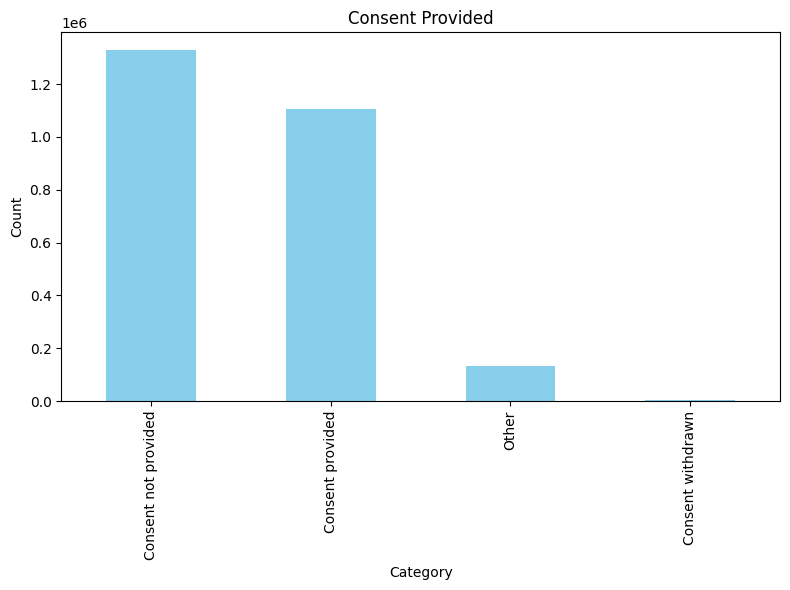

In [27]:
category_counts = data1['Consumer consent provided?'].value_counts()


plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')


plt.title('Consent Provided')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [28]:
data1['Company response to consumer'].unique()

array(['In progress', 'Closed with explanation',
       'Closed with non-monetary relief', 'Closed with monetary relief',
       'Closed without relief', 'Untimely response', 'Closed',
       'Closed with relief'], dtype=object)

COMPANY VS COMPANY PUBLIC RESPONSE

In [32]:
a=data1['Company public response'].value_counts()
print(a)
#out= data1.groupby(['Company', 'Company public response']).size().unstack(fill_value=0)
#print(out)

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            1364761
Company believes it acted appropriately as authorized by contract or law                                                     97807
Company chooses not to provide a public response                                                                             18521
Company believes the complaint is the result of a misunderstanding                                                           11275
Company disputes the facts presented in the complaint                                                                         8895
Company believes complaint caused principally by actions of third party outside the control or direction of the company       5947
Company believes complaint is the result of an isolated error                                                                 4617
Company can't verify or dispute the facts in the complaint                         

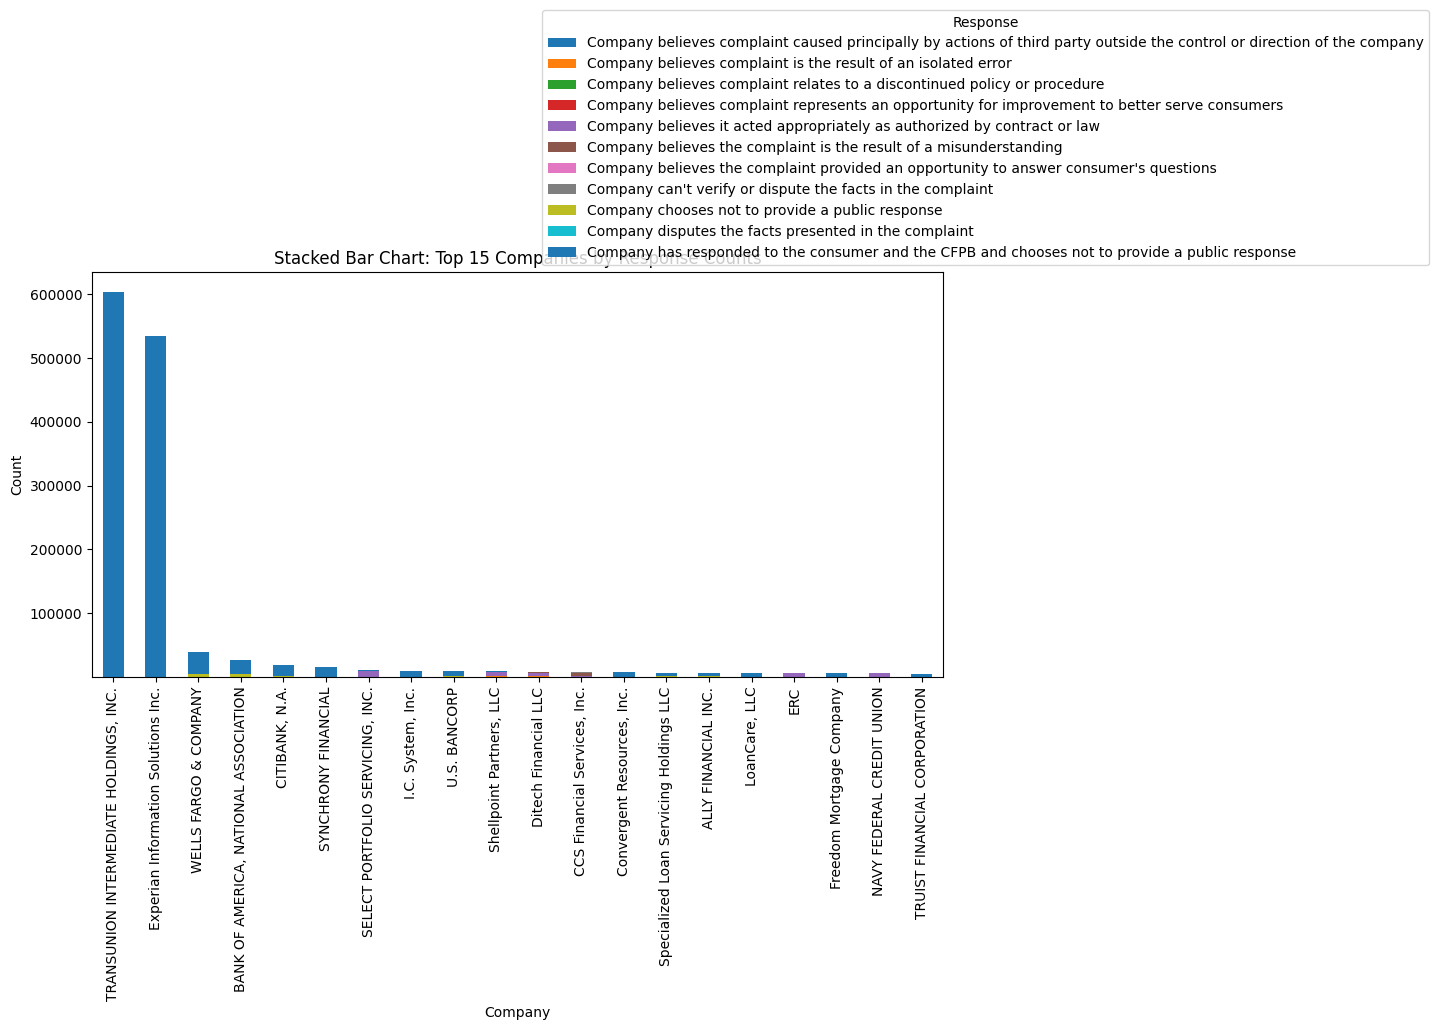

In [33]:
grouped_data = data1.groupby(['Company', 'Company public response']).size().unstack(fill_value=0)

total_counts = grouped_data.sum(axis=1)

top_15_companies = total_counts.nlargest(20)
filtered_grouped_data = grouped_data.loc[top_15_companies.index]
ax = filtered_grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))


plt.title('Stacked Bar Chart: Top 15 Companies by Response Counts')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.tight_layout()
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='lower center')
plt.show()


In [70]:
company_a_data = data1[data1['Company'] == 'SYNCHRONY FINANCIAL']
product_counts = company_a_data['Product'].value_counts()


if not product_counts.empty:
    highest_count_product = product_counts.idxmax()
    highest_count = product_counts.max()

    print(f"For company 'SYNCHRONY FINANCIAL', the highest count product is '{highest_count_product}' with {highest_count} occurrences.")
else:
    print("No data found for company 'SYNCHRONY FINANCIAL'.")

For company 'SYNCHRONY FINANCIAL', the highest count product is 'Credit reporting, credit repair services, or other personal consumer reports' with 9213 occurrences.


In [69]:
company_a_data = data1[data1['Company'] == 'EQUIFAX, INC.']
product_counts = company_a_data['Product'].value_counts()


if not product_counts.empty:
    highest_count_product = product_counts.idxmax()
    highest_count = product_counts.max()

    print(f"For company 'EQUIFAX, INC.', the highest count product is '{highest_count_product}' with {highest_count} occurrences.")
else:
    print("No data found for company 'EQUIFAX, INC.'.")

For company 'EQUIFAX, INC.', the highest count product is 'Credit reporting, credit repair services, or other personal consumer reports' with 699023 occurrences.


In [75]:
company_a_data = data1[data1['Company'] == 'snw investments']
product_counts = company_a_data['Product'].value_counts()


if not product_counts.empty:
    highest_count_product = product_counts.idxmax()
    highest_count = product_counts.max()

    print(f"For company 'snw investments', the highest count product is '{highest_count_product}' with {highest_count} occurrences.")
else:
    print("No data found for company 'snw investments'.")

For company 'snw investments', the highest count product is 'Mortgage' with 2 occurrences.


In [79]:
timely_response_counts = data1['Timely response?'].value_counts()

state_response_counts = data1.groupby(['State', 'Timely response?']).size().unstack(fill_value=0)
print(state_response_counts)

Timely response?   No    Yes
State                       
AA                  0     38
AE                 10    742
AK                 36   2309
AL                562  65652
AP                  9    395
...               ...    ...
VT                 40   1525
WA                849  32305
WI                368  22659
WV                124   4093
WY                 59   1613

[63 rows x 2 columns]


In [80]:
timely_response_counts = data1['Timely response?'].value_counts()

company_response_counts = data1.groupby(['Company', 'Timely response?']).size().unstack(fill_value=0)
print(pd.DataFrame(company_response_counts))

Timely response?                          No  Yes
Company                                          
(Former)Shapiro, Swertfeger & Hasty, LLP  12    0
1 Auto Finance, Inc.                       3    0
1 STOP MONEY CENTERS, LLC                  1    2
10 Cent Title Pawn Inc                     0    1
16 Hands LLC. dba Fiducius                 0    1
...                                       ..  ...
iQuantified Management Services, LLC       3   19
iReverse Home Loans, Corporation           0    1
snapfi, inc.                               0    2
snw investments                            0    2
 Lippman Recupero, LLC                     1    8

[6458 rows x 2 columns]


List of companies that 'Do' and 'Do not' give timely responses to its customers

In [84]:
timely_response_counts = data1['Timely response?'].value_counts()
company_response_counts = data1.groupby(['Company', 'Timely response?']).size().unstack(fill_value=0)

companies_with_zero_yes = company_response_counts[company_response_counts['Yes'] == 0]

count_of_companies_with_zero_yes = len(companies_with_zero_yes)


if count_of_companies_with_zero_yes > 0:
    print("Companies with 0 'Yes' count:")
    print(companies_with_zero_yes.index.tolist())
    print("Count of companies with 0 'Yes' count:", count_of_companies_with_zero_yes)
else:
    print("No companies have 0 'Yes' count.")

Companies with 0 'Yes' count:
['(Former)Shapiro, Swertfeger & Hasty, LLP', '1 Auto Finance, Inc.', '360 Mortgage Inc.', 'A & O Recovery Solutions, LLC', 'A Credits Works', 'A.R.C. Accounts Recovery (U.S.A.) Corporation LLC', 'AAA LEGACY INVESTMENTS', 'AARON DELGADO AND ASSOCIATES INC', 'ABA Recovery Service, Inc.', 'ACC Management, Inc.', 'ACE LENDING GROUP, LLC', 'ACH Recovery Solutions', 'ACS Financial LLC', 'AFM Financial Services, LLC', 'ALG', 'ALKAN MORTGAGE CORPORATION', 'ALL FAMILY FINANCE, LLC', 'ALLTRAN FINANCIAL, LP', 'AMERICONSULTANTS, LLC', 'AMRON PROFESSIONAL SERVICES', 'ANSELL GRIMM & AARON, P.C.', 'AT&T', 'AUDUBON LIBERTY & ASSOCIATES', 'AUTOMATED RECOVERY SYSTEMS, INC', 'Abendroth and Russell, P.C.', 'Able Mortgage', 'Absolute investment Group', 'Account Recovery Service, Inc. (WI)', 'Accounts Recovery Agency Inc.', 'Accscient, LLC', 'Activity Collection Service', 'Adobe Settlement Group, LLC', 'Advance Paychecks,  LLC', 'Advantage One Credit, LLC', 'Affordable Interest

In [85]:
timely_response_counts = data1['Timely response?'].value_counts()
company_response_counts = data1.groupby(['Company', 'Timely response?']).size().unstack(fill_value=0)

companies_with_zero_no = company_response_counts[company_response_counts['No'] == 0]
count_of_companies_with_zero_no = len(companies_with_zero_no)


if count_of_companies_with_zero_no > 0:
    print("Companies with 0 'No' count:")
    print(companies_with_zero_no.index.tolist())
    print("Count of companies with 0 'No' count:", count_of_companies_with_zero_no)
else:
    print("No companies have 0 'No' count.")

Companies with 0 'No' count:
['10 Cent Title Pawn Inc', '16 Hands LLC. dba Fiducius', '1803 Capital, LLC', '1ST PREFERENCE MORTGAGE CORP', '1ST RESULTS BILLINGS & COLLECTIONS, INC.', '1st Capital Finance of South Carolina, Inc.', '1st Capital Mortgage, LLC', '1st Midwest Mortgage Corp', '1st Money Center, Inc., Hurst, TX Branch', '1st Portfolio Holding Corporation', '1st United Funding, LLC', '2288984 Ontario Inc.', '24 Asset Management Corp', '245 Holdings LLC', '360 Credit Consulting', '391 Financial, Inc.', '3D Financial, LP', '3G+1, Inc. dba California Auto Finance', '60 Month Loans, Inc.', '77 Elite', '90 Day Credit Experts', '950 Credit Inc', '99th Floor LLC', 'A & A North American Financial, LLC', 'A&D Mortgage LLC', 'A+ Financial Services, Inc.', 'A+ Loans, Inc.', 'A-1 Fast Cash of Tucker, Inc', 'A-L FINANCIAL CORP', 'A-M-S Mortgage Services, Inc.', 'A.I.T. Credit Services Inc.', 'A.L. Babbs and Associates, LLC', 'A/R CONCEPTS, INC.', 'A1 Solutions Group Inc', 'AAA Auto Title L

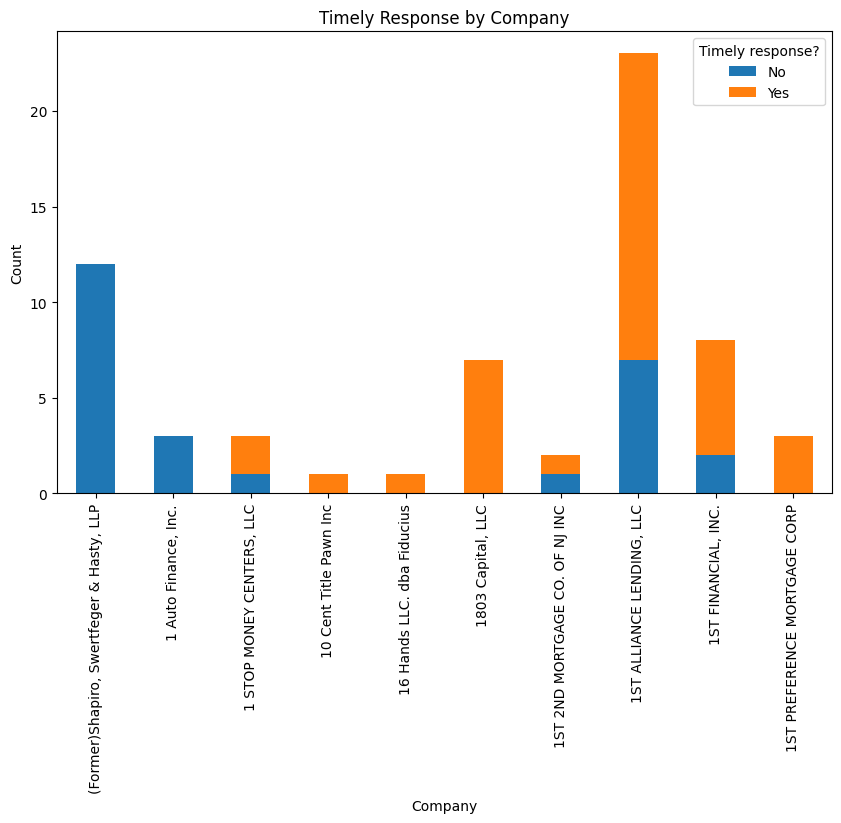

In [37]:
state_response_counts = data1.groupby(['Company', 'Timely response?']).size().unstack(fill_value=0).head(10)


ax = state_response_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Company')
ax.set_ylabel('Count')
ax.set_title('Timely Response by Company')
plt.xticks(rotation=90)
plt.show()

In [38]:
companies = data1.groupby('Company').Company.count().sort_values(ascending=False)
print(len(companies))
companies.head(15)

6458


Company
EQUIFAX, INC.                             707879
TRANSUNION INTERMEDIATE HOLDINGS, INC.    630851
Experian Information Solutions Inc.       581048
WELLS FARGO & COMPANY                      60496
BANK OF AMERICA, NATIONAL ASSOCIATION      59878
JPMORGAN CHASE & CO.                       38481
Ocwen Financial Corporation                33928
CAPITAL ONE FINANCIAL CORPORATION          33916
CITIBANK, N.A.                             27319
PORTFOLIO RECOVERY ASSOCIATES INC          24684
ENCORE CAPITAL GROUP INC.                  22071
NATIONSTAR MORTGAGE LLC                    19241
SYNCHRONY FINANCIAL                        17562
Resurgent Capital Services L.P.            15628
Ditech Financial LLC                       14849
Name: Company, dtype: int64

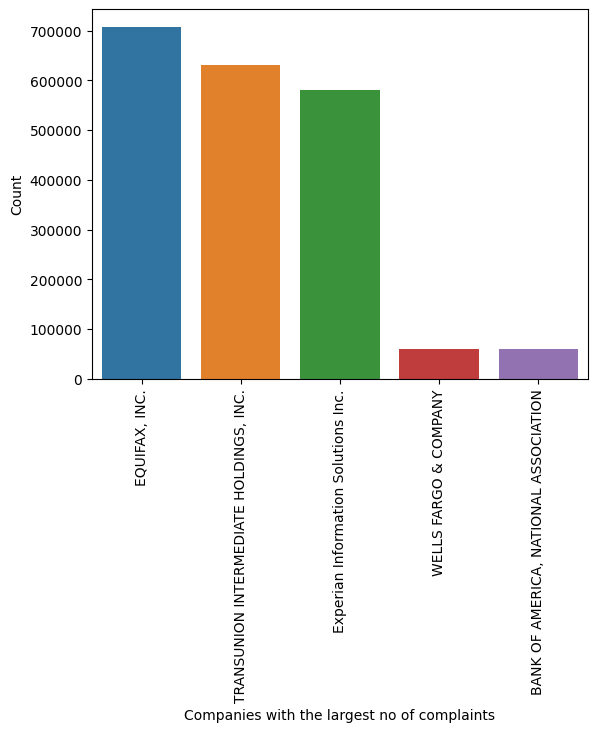

In [39]:
top= companies.head()

g = sns.barplot(x=top.index, y=top.values)
g.set(xlabel="Companies with the largest no of complaints", ylabel="Count")
plt.xticks(rotation=90)
plt.show()


In [40]:
issue_counts = data1['Issue'].value_counts()
issue_counts

Incorrect information on your report                                                1020461
Problem with a credit reporting company's investigation into an existing problem     579950
Improper use of your report                                                          511097
Attempts to collect debt not owed                                                    180953
Loan modification,collection,foreclosure                                             112306
                                                                                     ...   
Struggling to pay your loan                                                               1
Closing your account                                                                      1
Problem with the payoff process at the end of the loan                                    1
Fees or interest                                                                          1
Getting a line of credit                                                        

In [41]:
data1['Sub-issue'].value_counts()

Information belongs to someone else                         675880
Reporting company used your report improperly               342256
Their investigation did not fix an error on your report     330222
Credit inquiries on your report that you don't recognize    165554
Investigation took more than 30 days                        130542
                                                             ...  
Problem during payment process                                   1
Can't close your account                                         1
Denied request to lower payments                                 1
Problem with fraud alerts or security freezes                    1
Application denied                                               1
Name: Sub-issue, Length: 120, dtype: int64

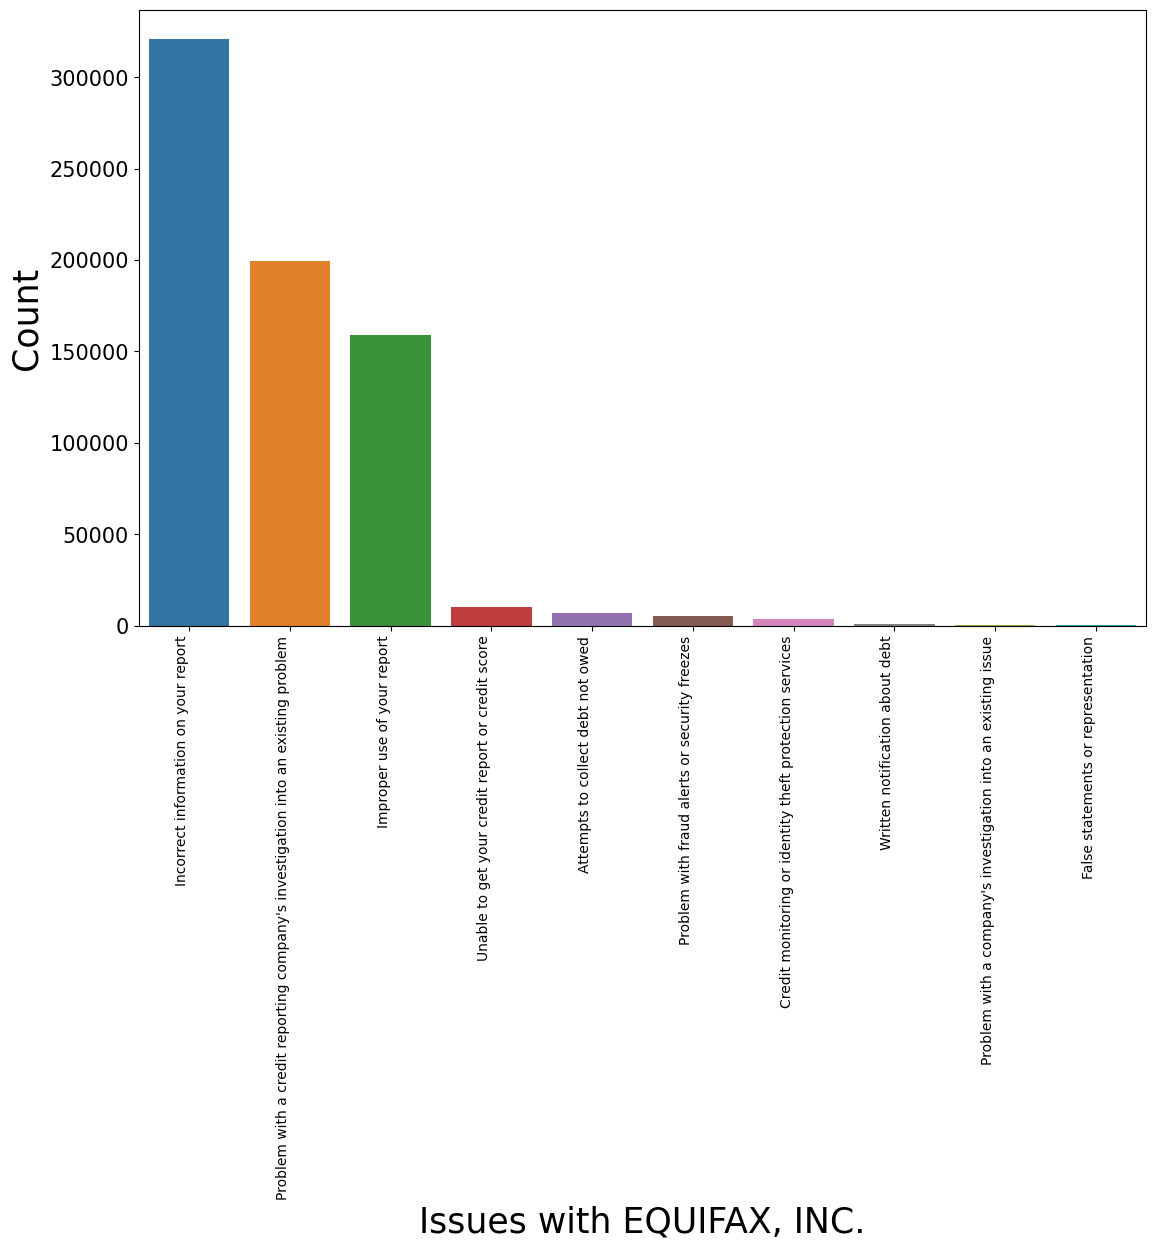

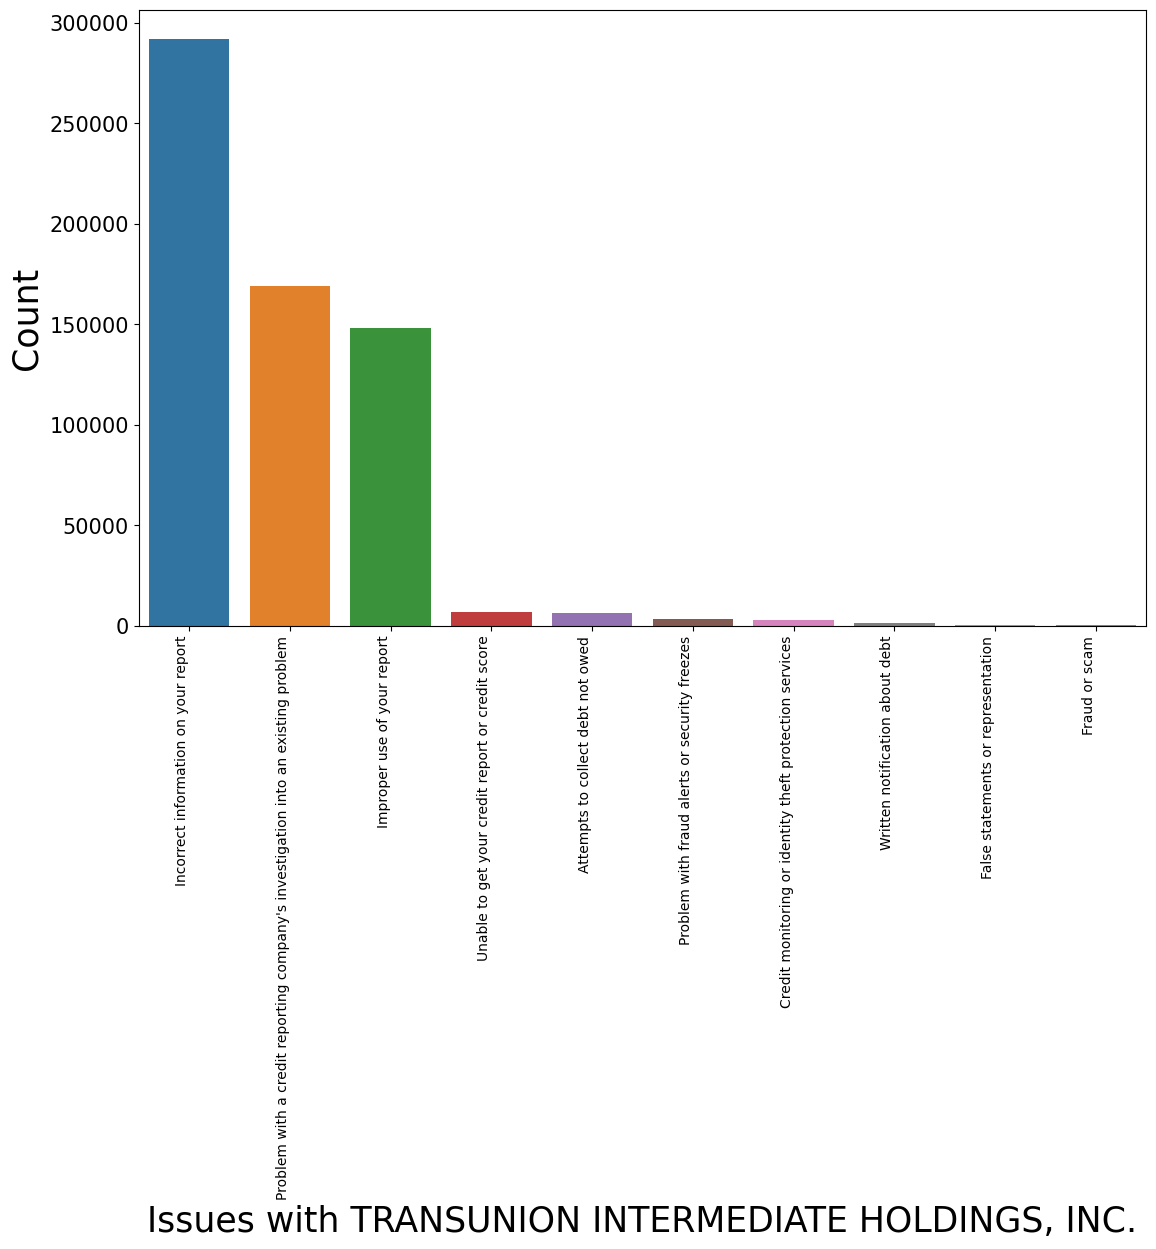

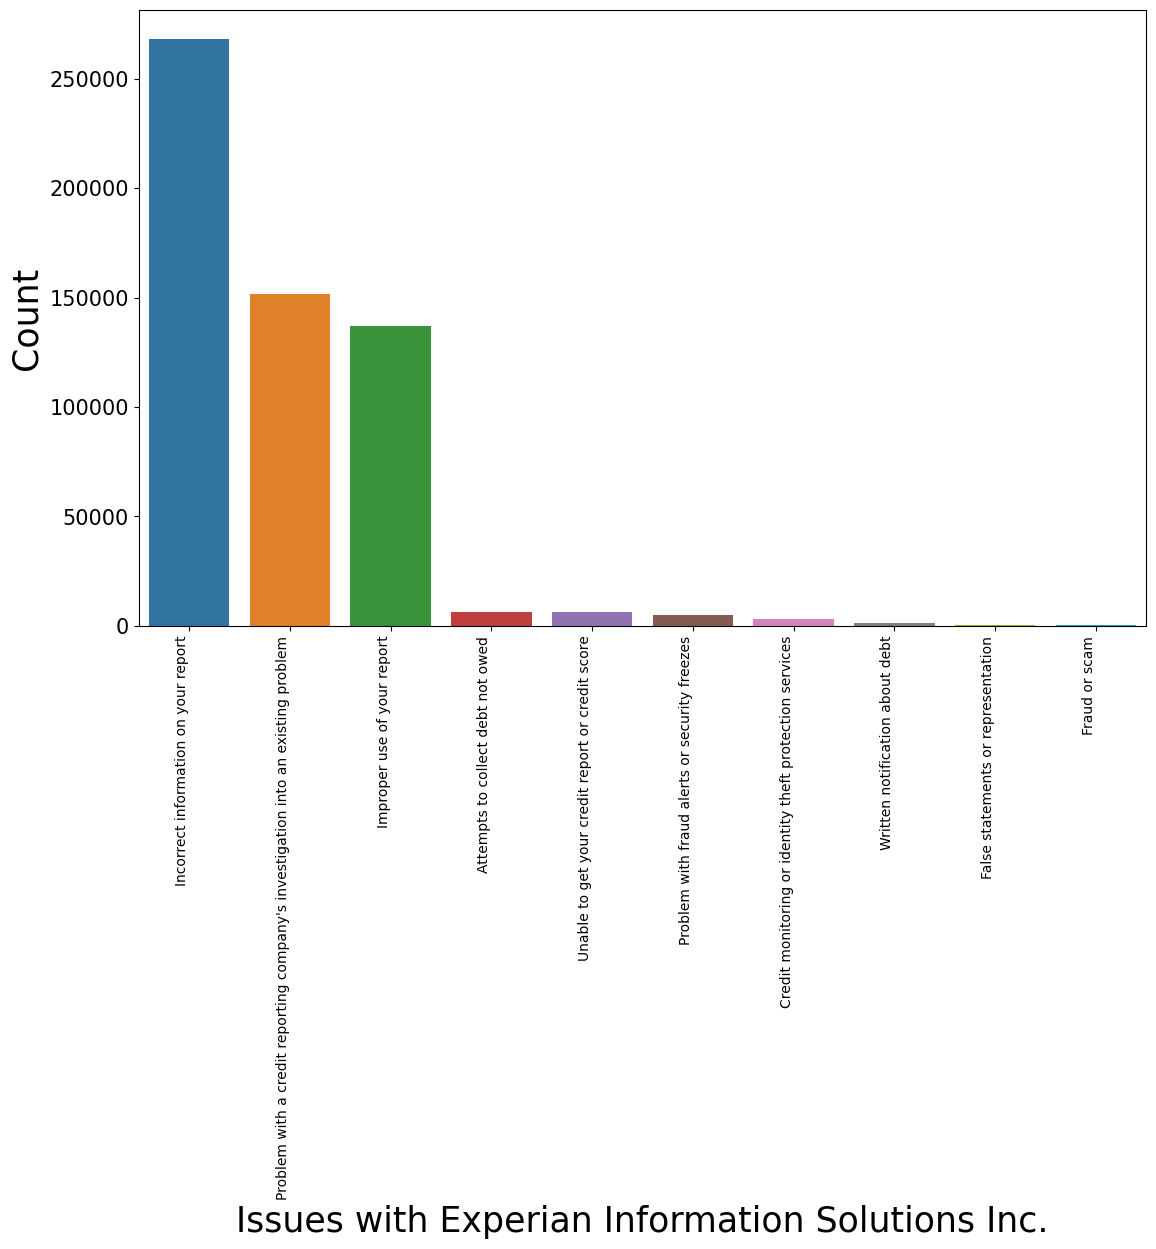

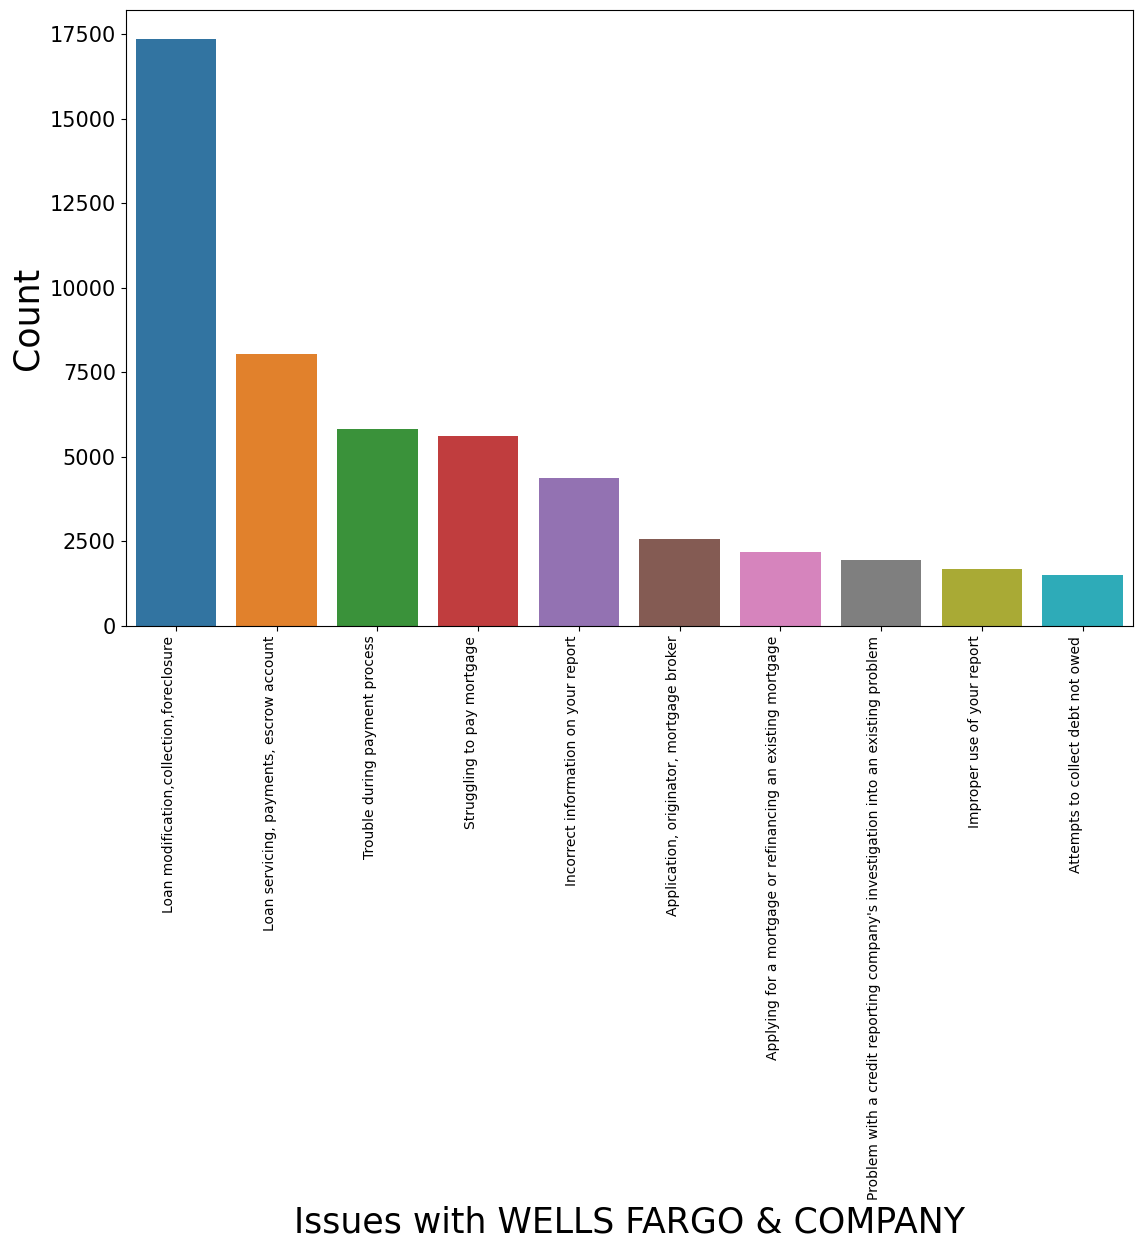

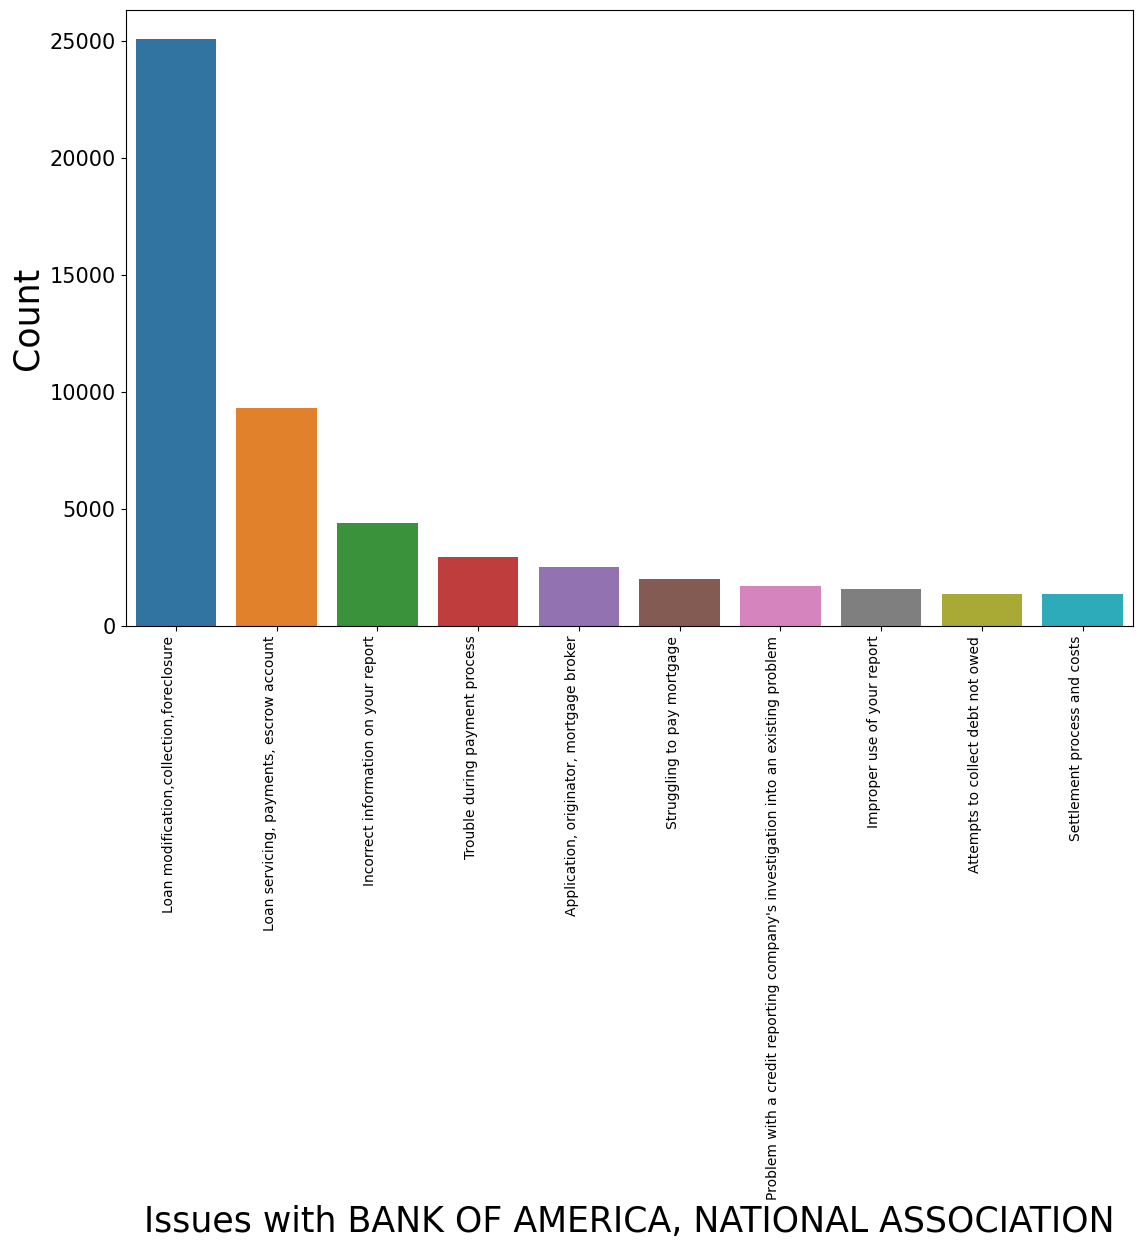

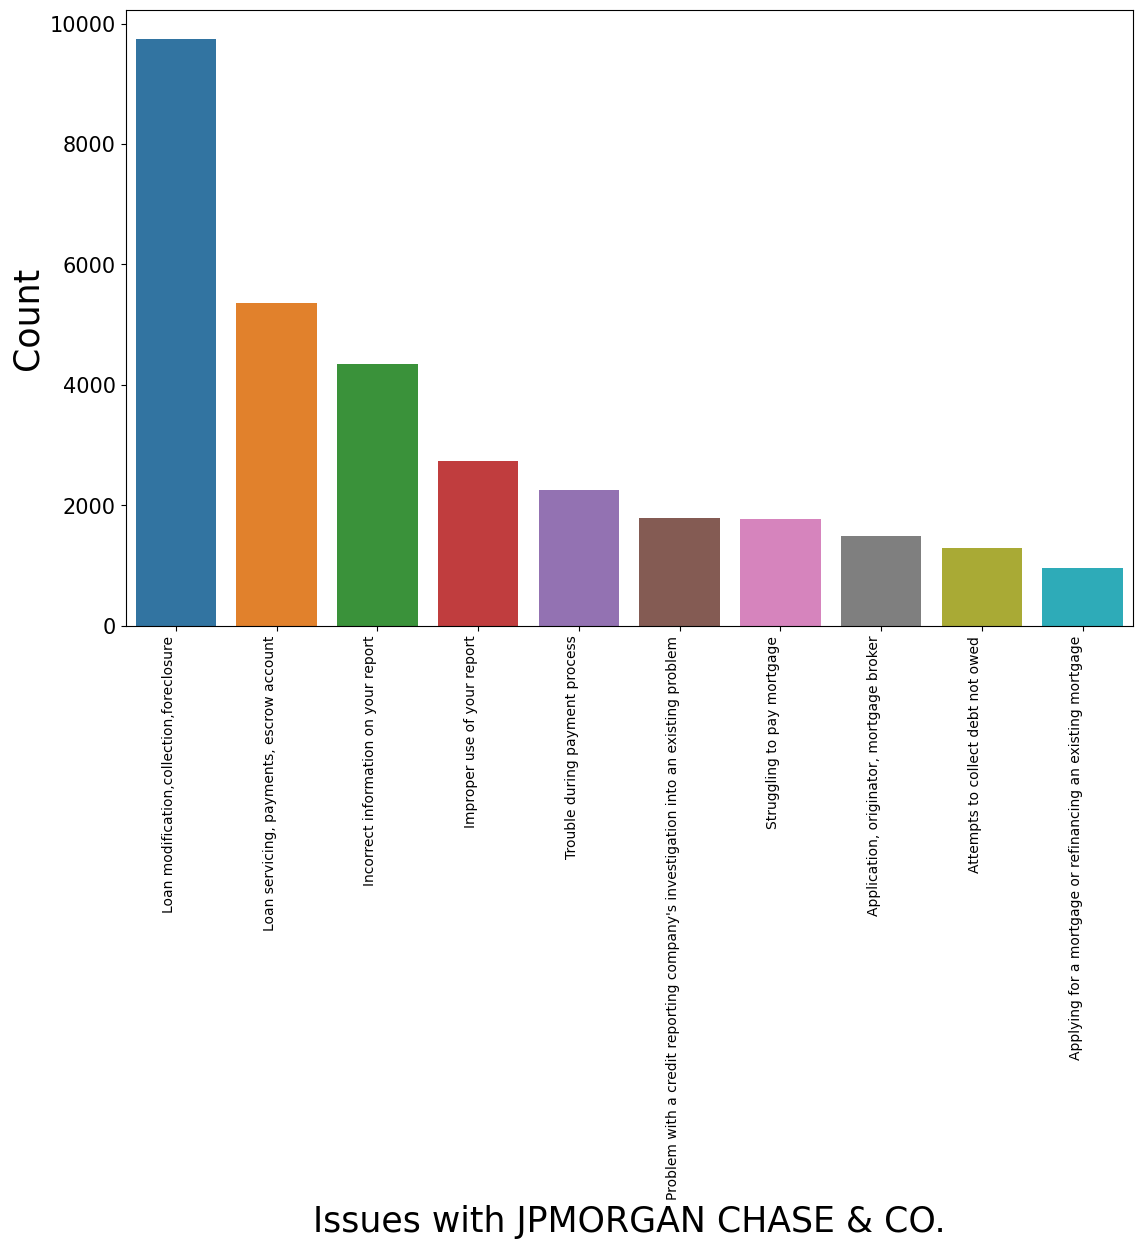

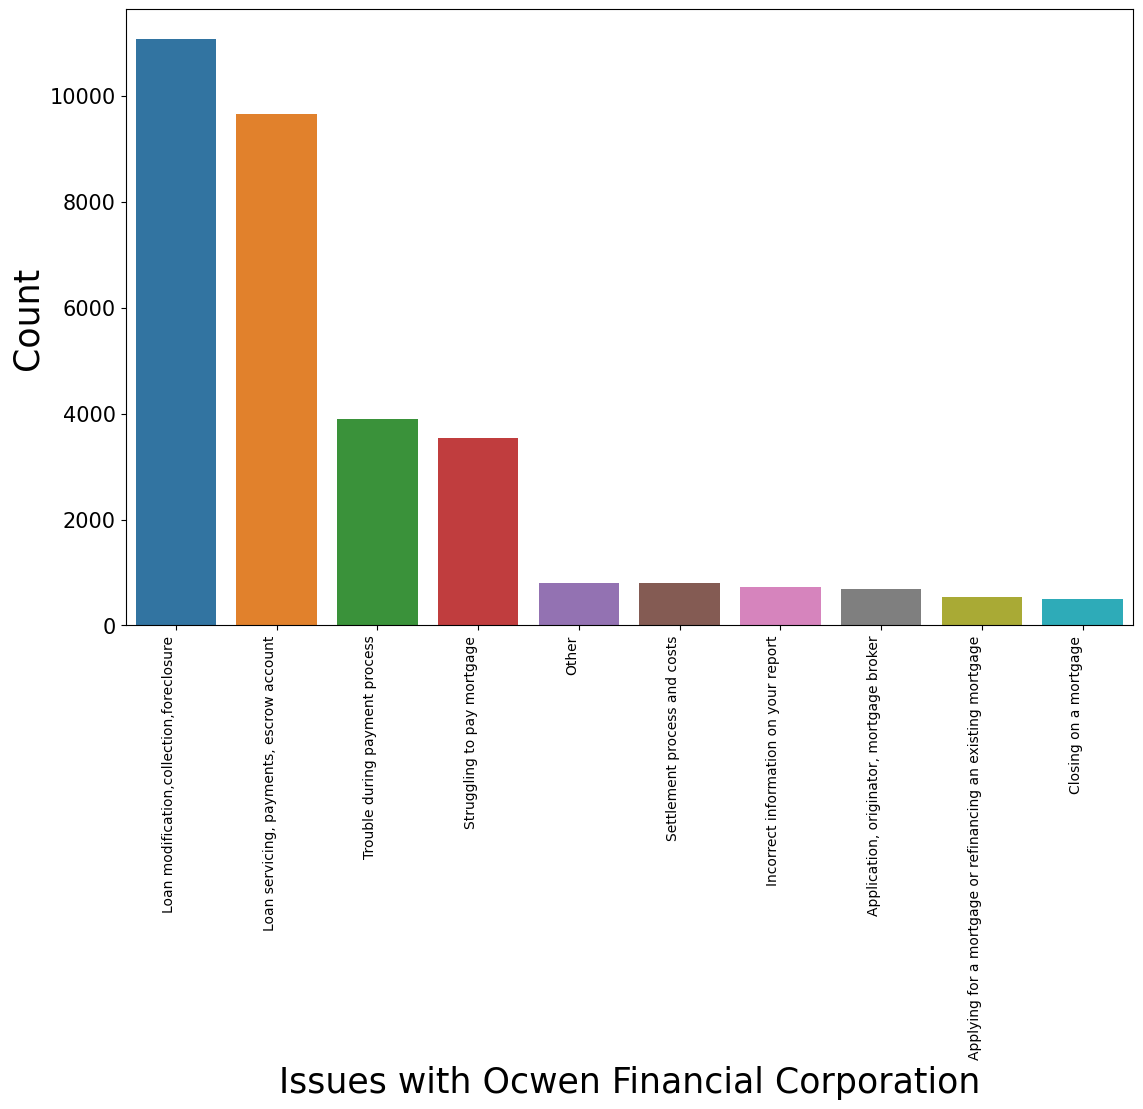

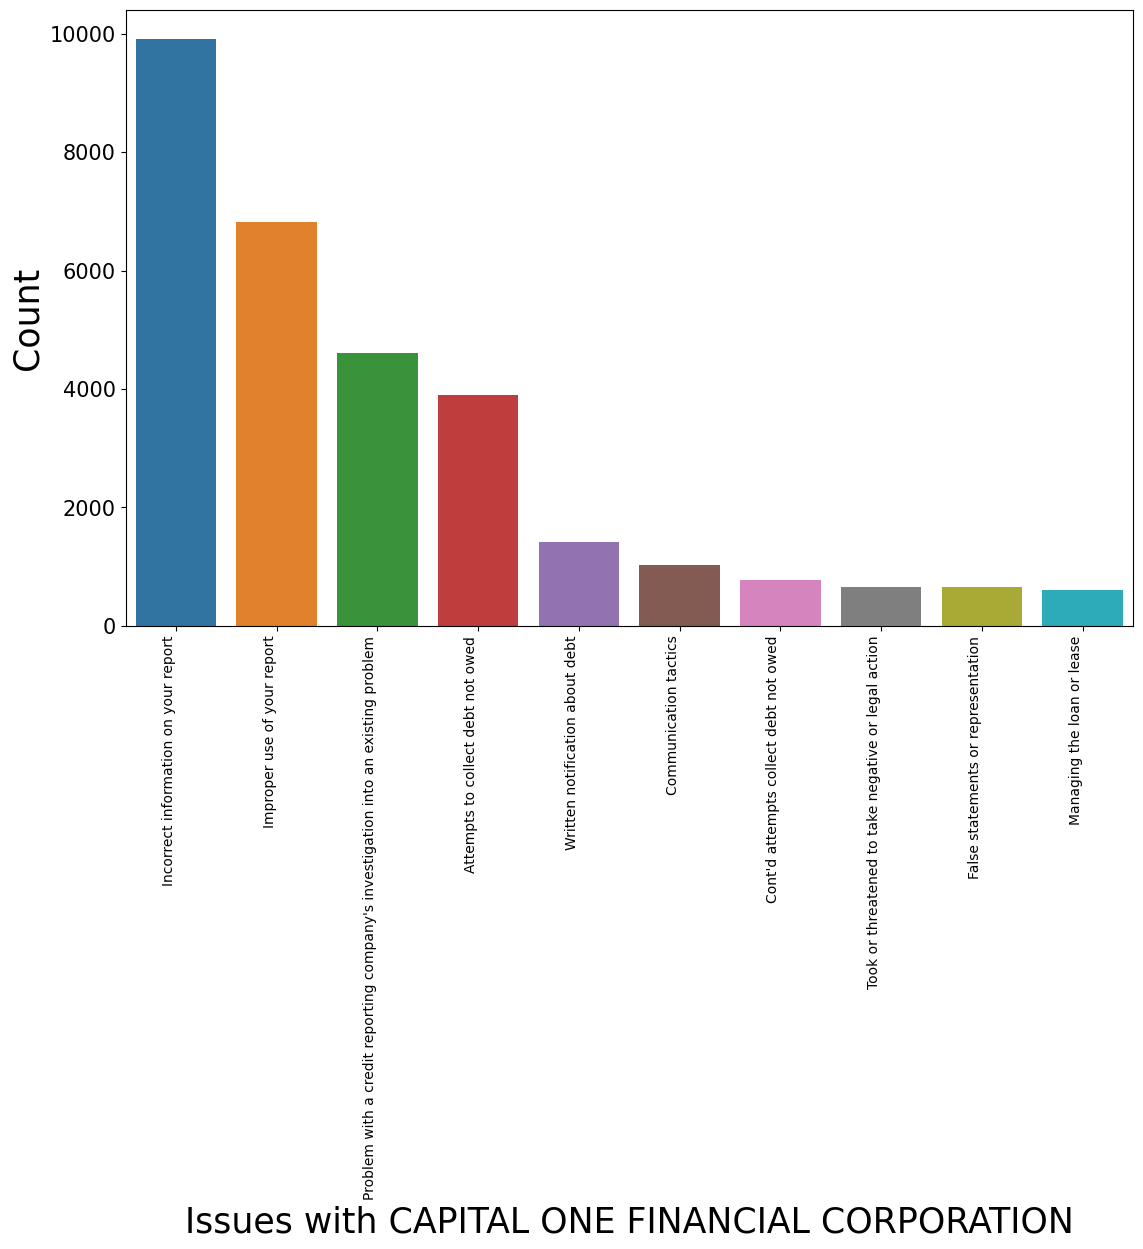

In [42]:
def plot_companies(company):
    issue_company = (data1[data1['Company']==company].groupby("Issue").
                                Issue.count().sort_values(ascending=False)[0:10])
    plt.figure(figsize = (13,8))
    plt.xticks(rotation=90, ha="right")
    plt.yticks(fontsize=15)
    g = sns.barplot(x=issue_company.index, y=issue_company.values)
    g.set_xlabel("Issues with {company}".format(company=company), fontsize=25)
    g.set_ylabel("Count", fontsize=25)

plot_companies("EQUIFAX, INC.")
plot_companies("TRANSUNION INTERMEDIATE HOLDINGS, INC.")
plot_companies("Experian Information Solutions Inc.")
plot_companies("WELLS FARGO & COMPANY")
plot_companies("BANK OF AMERICA, NATIONAL ASSOCIATION")
plot_companies("JPMORGAN CHASE & CO.")
plot_companies("Ocwen Financial Corporation")
plot_companies("CAPITAL ONE FINANCIAL CORPORATION")

In [43]:
data1['Consumer disputed?'].value_counts()

No     320439
Yes     83774
Name: Consumer disputed?, dtype: int64

<Axes: ylabel='Sub-product'>

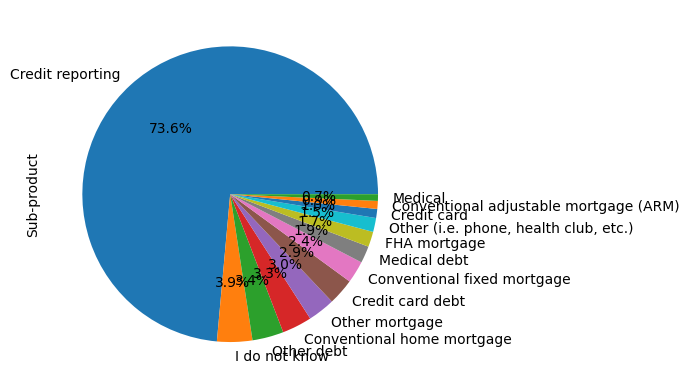

In [44]:
data1["Sub-product"].value_counts().head(13).plot(kind="pie", autopct="%.1f%%")

<Figure size 1600x800 with 0 Axes>

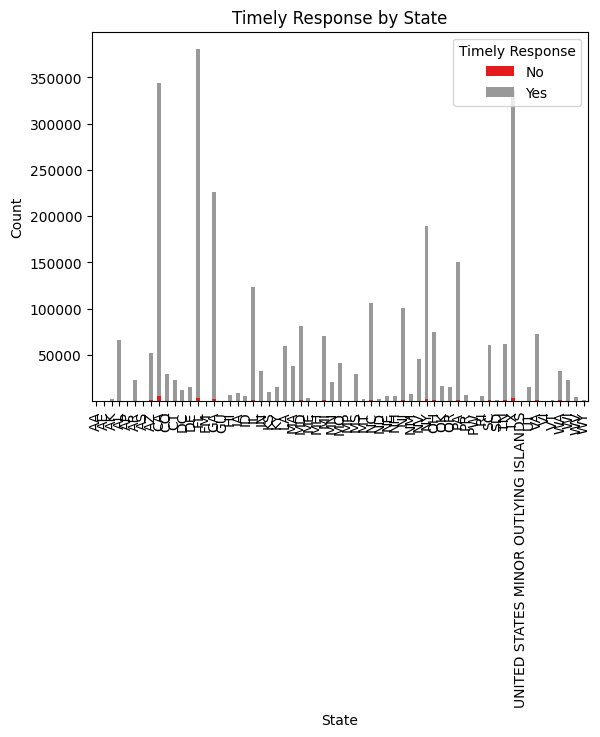

In [45]:
pivot_table = pd.pivot_table(data1, index='State', columns='Timely response?', aggfunc='size', fill_value=0)


plt.figure(figsize=(16,8))
pivot_table.plot(kind='bar', stacked=True, colormap='Set1')


plt.title('Timely Response by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Timely Response', loc='upper right')
plt.show()

Count of complaints received every year

<ipython-input-46-a86dc15ad26c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year'] = pd.to_datetime(data1['Date received']).dt.year


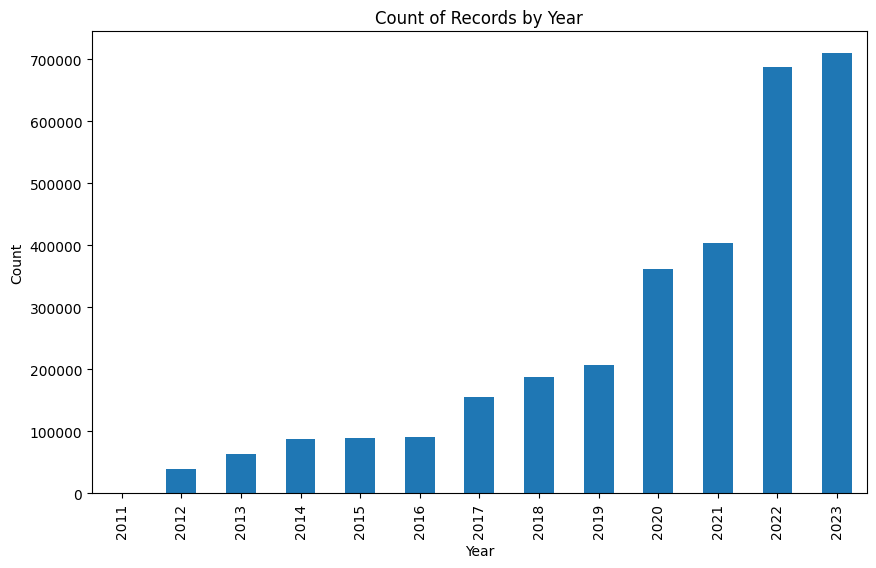

In [46]:
data1['year'] = pd.to_datetime(data1['Date received']).dt.year
year_counts = data1['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

year_counts.plot(kind='bar')


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Records by Year')
plt.show()

**PRODUCT**

In [47]:
target_product = 'Credit reporting, credit repair services, or other personal consumer reports'
filtered_df = data1[data1['Product'] == target_product]

sub_product_counts = filtered_df['Sub-product'].value_counts()
print(sub_product_counts)


Credit reporting                  2146468
Other personal consumer report      16045
Credit repair services               5052
Conventional home mortgage              1
Name: Sub-product, dtype: int64


In [48]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
p_product_discussions = round(data1["Product"].value_counts() / len(data1["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58']


product_pie = go.Pie(labels=labels, values=values,
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Credit reporting, credit repair services, or other personal consumer reports    70.21
Debt collection                                                                 16.34
Mortgage                                                                        12.42
Consumer Loan                                                                    1.02
Name: Product, dtype: float64


**Submitted VIA**

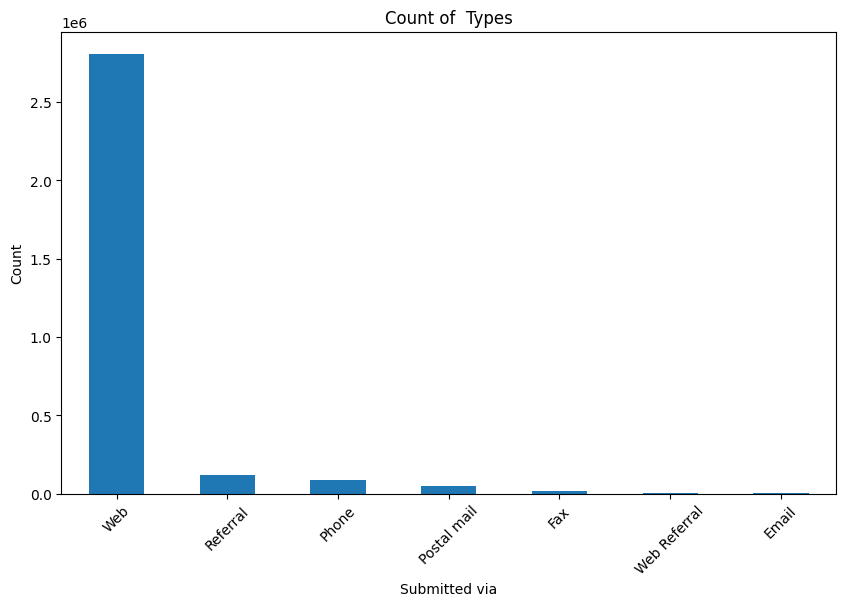

In [49]:
web_type_counts = data1['Submitted via'].value_counts()


plt.figure(figsize=(10, 6))
web_type_counts.plot(kind='bar')

plt.title('Count of  Types')
plt.xlabel('Submitted via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [50]:
state_counts = data1['State'].value_counts()
state_counts

FL    380497
CA    344522
TX    336892
GA    226251
NY    189866
       ...  
AA        38
MP        23
AS        21
MH        18
PW         6
Name: State, Length: 63, dtype: int64

<Figure size 1000x600 with 0 Axes>

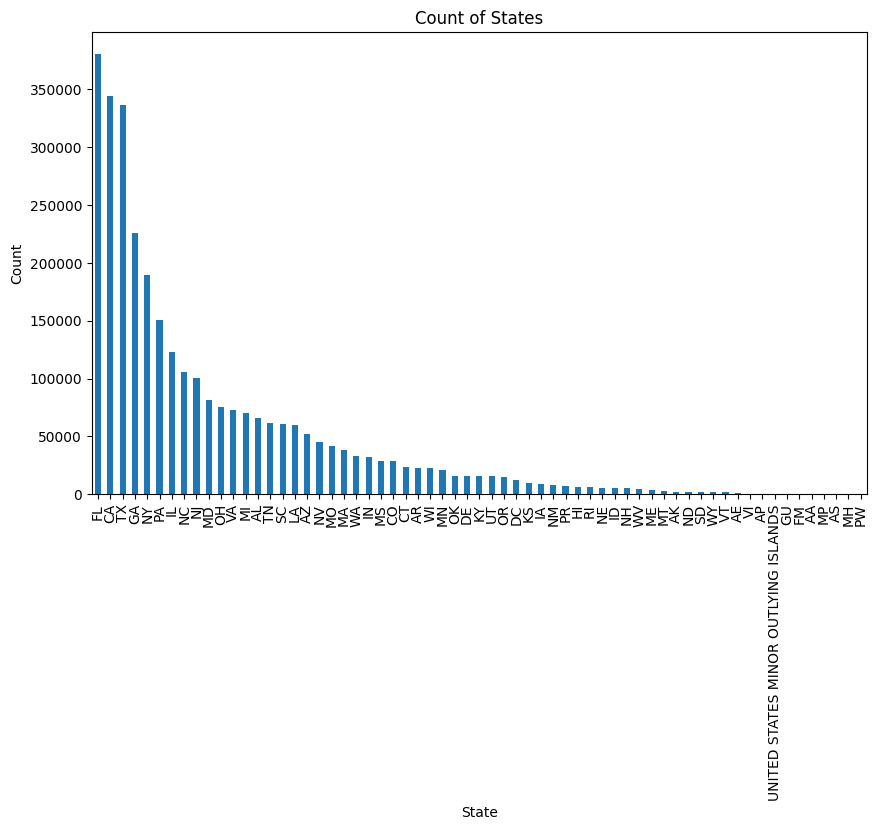

In [51]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')

plt.title('Count of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Least and high responsive States

In [52]:
state_response_counts = data1.groupby(['State', 'Timely response?']).size().unstack(fill_value=0)
state_response_counts['Percentage Yes'] = (state_response_counts['Yes'] / state_response_counts.sum(axis=1)) * 100


least_responsive_state = state_response_counts['Percentage Yes'].idxmin()
lowest_percentage = state_response_counts['Percentage Yes'].min()
print("the least responsive state is:"+least_responsive_state)
print(lowest_percentage)

the least responsive state is:MH
94.44444444444444


In [53]:
state_response_counts = data1.groupby(['State', 'Timely response?']).size().unstack(fill_value=0)
state_response_counts['Percentage Yes'] = (state_response_counts['Yes'] / state_response_counts.sum(axis=1)) * 100


most_active_state = state_response_counts['Percentage Yes'].idxmax()
highest_percentage = state_response_counts['Percentage Yes'].max()
print("the highest responsive state is:"+most_active_state)
print(highest_percentage)

the highest responsive state is:AA
100.0


In [54]:
data1 = data1.drop('Complaint ID',axis=1)

In [55]:
data1['Consumer disputed?'] = np.where(data1['Consumer disputed?']== 'Yes', 1, 0)
data1['Consumer disputed?'].value_counts()

0    3003414
1      83774
Name: Consumer disputed?, dtype: int64

In [56]:
df1 = data1[['Product', 'Consumer complaint narrative']].copy()

In [57]:
df1

,Product,Consumer complaint narrative
2,"Credit reporting, credit repair services, or o...",NaN
3,"Credit reporting, credit repair services, or o...",NaN
4,"Credit reporting, credit repair services, or o...",NaN
5,"Credit reporting, credit repair services, or o...",NaN
6,"Credit reporting, credit repair services, or o...",NaN
...,...,...
4051240,Debt collection,NaN
4051245,Debt collection,NaN
4051246,Debt collection,NaN
4051249,Mortgage,NaN


In [58]:
df1.dropna(inplace=True)

In [59]:
df1.shape

(1104476, 2)

In [60]:
df1

,Product,Consumer complaint narrative
14,"Credit reporting, credit repair services, or o...",I am a victim of identity theft please remove ...
17,"Credit reporting, credit repair services, or o...",Please remove this inquiry from my credit repo...
18,"Credit reporting, credit repair services, or o...",The following inquiries appear on my account. ...
19,"Credit reporting, credit repair services, or o...",I've found that my credit report has erroneous...
24,"Credit reporting, credit repair services, or o...","Synchrony, Bank discount tire had Called me fo..."
...,...,...
4050816,Mortgage,Up until recently I had a mortgage with XXXX X...
4050905,Debt collection,After being personally harassed in public with...
4051021,Debt collection,"I XXXX XXXX am a person, non-adverse, non-bell..."
4051052,Debt collection,Original Creditor - XXXX XXXX ; XXXX XXXX - US...


In [61]:
df1['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Debt collection', 'Consumer Loan'], dtype=object)

**NAIVE BAYES CLASSIFIER**

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Product'] = label_encoder.fit_transform(df1['Product'])


X = df1['Consumer complaint narrative']
y = df1['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.53      0.23      0.32      1868
           1       0.92      0.93      0.93    154041
           2       0.79      0.72      0.75     43495
           3       0.82      0.95      0.88     21492

    accuracy                           0.89    220896
   macro avg       0.77      0.71      0.72    220896
weighted avg       0.88      0.89      0.88    220896



**SGD** **CLASSIFIER**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_scaled = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

SGDClassifier()

In [64]:
sgdc.score(X_train, y_train)

0.9129502944512781

In [65]:
from sklearn.metrics import accuracy_score

y_pred = sgdc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

new_text_samples = df1['Consumer complaint narrative'].head(1)
new_text_samples_scaled = cv.transform(new_text_samples)

new_text_predictions = sgdc.predict(new_text_samples_scaled)

for i, text_sample in enumerate(new_text_samples):
    print(f"Text: {text_sample}")
    print(f"Predicted Label: {new_text_predictions[i]}\n")


Accuracy: 0.91
Text: I am a victim of identity theft please remove this fraud inquiry from my credit report.
Predicted Label: 1

